## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset


*   Reference for [Topic modeling ](https://https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.
 It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.
 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

def text_catagory(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'
    
file_name = 'cleaned_fintech_data.csv'
df = pd.read_csv(file_name)

# see polarity
df['polarity']

0       0.166667
1       0.133333
2       0.316667
3       0.086111
4       0.280000
          ...   
6527    0.000000
6528    0.086111
6529    0.281250
6530    0.125000
6531    0.000000
Name: polarity, Length: 6532, dtype: float64

In [8]:
cleanTweet = df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleanTweet.head()

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [9]:
# Apply text_category on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet, form a new column called  𝐬𝐜𝐨𝐫𝐞
cleanTweet['score'] = cleanTweet["polarity"].map(text_catagory)

In [10]:
cleanTweet.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


<AxesSubplot:xlabel='score'>

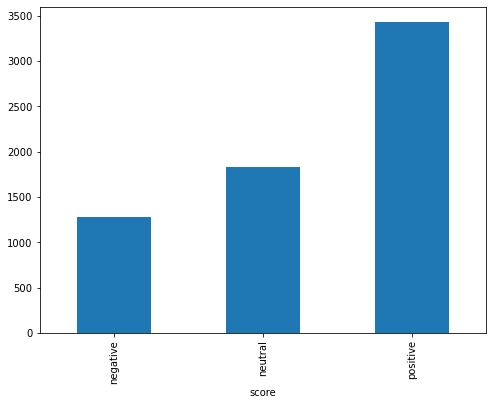

In [11]:
# visualize using BarChart
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean_text'].count().plot.bar(ax=axis)

<AxesSubplot:ylabel='clean_text'>

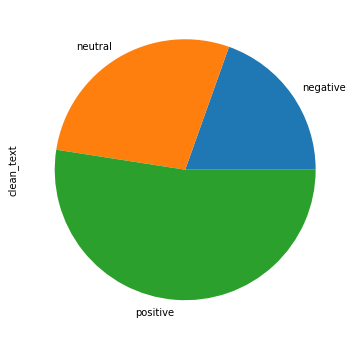

In [12]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
cleanTweet.groupby('score')['clean_text'].count().plot.pie(ax=axis)

In [13]:
# Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral)
cleanTweet = cleanTweet[cleanTweet['polarity'] != 0]

# reset the frame index.
cleanTweet.reset_index(drop=True, inplace=True)
cleanTweet.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [14]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    return 1 if (value == 'positive') else 0

cleanTweet['scoremap'] = cleanTweet['score'].map(get_score)
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,I think it’s important that we don’t sell COVA...,0.280000,positive,1


In [15]:
# Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.
X = cleanTweet['clean_text']
y = cleanTweet['scoremap']

In [16]:
# Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
# i dont' know what it is actually doing
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [17]:
# Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.
# pipeline = Pipeline([
#     ('vector',  CountVectorizer(analyzer='word', ngram_range=(3,3))),
#     ('tfitf', TfidfTransformer()),
#     ('clf', SGDClassifier(max_iter=1000))
# ])
# X_train_count = pipeline.fit(x_train, y_train)
# can't run this for y_train
# y_predection = X_train_count.predict(x_test)
cv = CountVectorizer(ngram_range=(3, 3))
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)
X_train_cv

<3527x22684 sparse matrix of type '<class 'numpy.int64'>'
	with 114816 stored elements in Compressed Sparse Row format>

In [18]:
# Evaluate your model on the test data.
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

In [19]:
results = confusion_matrix(y_test, predictions) 
results

array([[292,  39],
       [  2, 843]], dtype=int64)

In [20]:
# accuracy
accuracy_score(y_test, predictions)

0.9651360544217688

In [21]:
# Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       331
           1       0.96      1.00      0.98       845

    accuracy                           0.97      1176
   macro avg       0.97      0.94      0.96      1176
weighted avg       0.97      0.97      0.96      1176



**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [3]:
tweets_df=pd.read_csv('cleaned_fintech_data.csv')
tweets_df.dropna()


,Unnamed: 0,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
5,5,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus to...,0.508333,0.783333,en,683,220,SandhraLee,759,4163,None,WeCanDoThis\nCOVID19,CDCDirector,USA
9,9,Fri Jun 18 17:56:47 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",It is really something to see new research com...,0.372727,0.467424,en,3,1,DarkaDuna2014,94,144,None,Covid19,LongCovidNYC,"Bilbao, País Vasco"
16,16,Fri Jun 18 17:57:18 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",It is really something to see new research com...,0.372727,0.467424,en,5,3,SheriD17536431,470,1240,None,Covid19,LongCovidNYC,Nashville
19,19,Fri Jun 18 17:57:22 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",So glad to join training day for the DC #COVID...,0.625000,1.000000,en,6,3,stevenlwalker,5769,1848,None,COVID19,falcicchio,Bending stuff towards justice
29,29,Fri Jun 18 17:57:48 +0000 2021,"<a href=""https://about.twitter.com/products/tw...",It is really something to see new research com...,0.372727,0.467424,en,6,4,RGC_BPPA,2689,5003,None,Covid19,LongCovidNYC,"Lafayette, Louisiana"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,6510,Sat Jun 19 07:38:44 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",With vaccination coverage being expanded from ...,0.200000,0.400000,en,98,32,DPD_India,9757,94,None,COVID19,mygovindia,India
6511,6511,Sat Jun 19 07:38:47 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Over 990.25 million doses of #COVID19 #vaccine...,0.000000,0.000000,en,9,4,irfanakram,76,341,None,COVID19\nvaccines,PDChina,"Wazirabad,Pakistan"
6515,6515,Sat Jun 19 07:39:14 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Third wave of #coronavirus has hit Africa in a...,-0.116667,0.450000,en,309,43,khaleelwarsi,2923,2241,None,coronavirus,DrAMSinghvi,India
6522,6522,Sat Jun 19 07:40:29 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The Truth Behind COVID-19 Vaccines (6) —— Bell...,-0.386111,0.622222,en,2,2,Hhuatakedownccp,697,303,None,DrLiMengYan\nCCPVirus,edendomain,"Osaka-shi Chuo, Osaka"


In [4]:
len(tweets_df)

6532

In [22]:
cleanTweet = tweets_df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleanTweet.head()

,clean_text,polarity
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333
2,Thank you @research2note for creating this ama...,0.316667
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111
4,I think it’s important that we don’t sell COVA...,0.280000


In [23]:
# Apply text_category on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet, form a new column called  𝐬𝐜𝐨𝐫𝐞
cleanTweet['score'] = cleanTweet["polarity"].map(text_catagory)

In [24]:
# Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral)
cleanTweet = cleanTweet[cleanTweet['polarity'] != 0]

# reset the frame index.
cleanTweet.reset_index(drop=True, inplace=True)
cleanTweet.head()

,clean_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive
2,Thank you @research2note for creating this ama...,0.316667,positive
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive
4,I think it’s important that we don’t sell COVA...,0.280000,positive


In [25]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    return 1 if (value == 'positive') else 0

cleanTweet['scoremap'] = cleanTweet['score'].map(get_score)
cleanTweet.head()

,clean_text,polarity,score,scoremap
0,"🚨Africa is ""in the midst of a full-blown third...",0.166667,positive,1
1,"Dr Moeti is head of WHO in Africa, and one of ...",0.133333,positive,1
2,Thank you @research2note for creating this ama...,0.316667,positive,1
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,positive,1
4,I think it’s important that we don’t sell COVA...,0.280000,positive,1


In [31]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    #cleanTweet = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    cleanTweet['clean_text']=cleanTweet['clean_text'].astype(str)
    cleanTweet['clean_text'] = cleanTweet['clean_text'].apply(lambda x: x.lower())
    cleanTweet['clean_text']= cleanTweet['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in cleanTweet['clean_text']]
    word_list = [sent.split() for sent in sentence_list]

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list)
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]



    
    return word_list, word_to_id, corpus_1


In [33]:
PrepareData_obj=PrepareData(cleanTweet)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet



In [34]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:


pprint(lda_model.show_topics(formatted=False))

[(0,
  [('to', 0.035455454),
   ('the', 0.026376467),
   ('covid19', 0.02095555),
   ('a', 0.018707378),
   ('risk', 0.015022333),
   ('vaccines', 0.014484119),
   ('in', 0.014128335),
   ('your', 0.012817391),
   ('that', 0.012353266),
   ('of', 0.012145905)]),
 (1,
  [('vaccines', 0.04108493),
   ('age', 0.03400315),
   ('capacity', 0.032317996),
   ('min', 0.031033635),
   ('limit', 0.031033635),
   ('dose1', 0.031033635),
   ('pin', 0.031033635),
   ('covaxin', 0.023757929),
   ('pmcg', 0.018742956),
   ('0', 0.01812064)]),
 (2,
  [('of', 0.044023555),
   ('india', 0.043407995),
   ('the', 0.042644426),
   ('in', 0.04256079),
   ('africa', 0.036441024),
   ('covid19', 0.030540043),
   ('wave', 0.027137108),
   ('third', 0.02658758),
   ('a', 0.02233464),
   ('cases', 0.021765891)]),
 (3,
  [('to', 0.0405088),
   ('the', 0.04048643),
   ('and', 0.037504062),
   ('we', 0.02360637),
   ('vaccines', 0.021986641),
   ('of', 0.02001904),
   ('in', 0.019208804),
   ('need', 0.01872153),
 

Each line is a topic with individual topic terms and weights. Topic0  can be termed as climate change, and Topic4 can be termed as government and carbon emission.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [36]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -6.47064946288357

 Ldamodel Coherence Score/Accuracy on Tweets:  0.5083747137084009


Basic Ldamodel Coherence Score 0.58 This means that the model has performed reasonably well in topic modeling.

In [37]:
!pip install pyLDAvis 

Processing c:\users\user\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a\pyldavis-3.3.1-py2.py3-none-any.whl
Processing c:\users\user\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897\sklearn-0.0-py2.py3-none-any.whl
  Using cached pandas-1.2.5-cp38-cp38-win_amd64.whl (9.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [38]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.123301  0.044257       1        1  33.155808
3     -0.119695 -0.028544       2        1  25.560286
2     -0.099969 -0.230786       3        1  15.128756
0     -0.060398  0.232412       4        1  14.490312
1      0.403363 -0.017339       5        1  11.664839, topic_info=         Term         Freq        Total Category  logprob  loglift
291     india  1019.000000  1019.000000  Default  30.0000  30.0000
34     africa  1541.000000  1541.000000  Default  29.0000  29.0000
731       age   616.000000   616.000000  Default  28.0000  28.0000
733  capacity   585.000000   585.000000  Default  27.0000  27.0000
62   vaccines  3059.000000  3059.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
582      june   142.049334   166.589801   Topic5  -4.8475   1.9892
62   vaccines   743.626871  3059.787008   Topic5  -3.1921   0.7340
222       new   131.947879   271.232415   Topic5  -4.9212   1.4280
10     deaths   102.061145   252.769966   Topic5  -5.1781   1.2417
7       cases    93.230441   604.852346   Topic5  -5.2686   0.2787

[293 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
757       5  0.997555            0
2668      5  0.984091          118
749       3  0.108658           18
749       5  0.889640           18
154       4  0.988228  18002320233
...     ...       ...          ...
1352      4  0.992139        youre
176       4  0.994834          zip
121       1  0.996581        “list
179       4  0.992766            🔍
7133      2  0.995892            🔰

[343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])